In [5]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Laden der Daten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')

# Hinzufügen einer Spalte, um den Autor zu kennzeichnen
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'

# Zusammenführen der Daten
data = pd.concat([ai_data, human_data])

# Umwandeln der Daten in ein langes Format für die ANOVA
melted_data = pd.melt(data, id_vars=['Autor'], value_vars=[
    'Geld - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Sport - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?'
], var_name='Thema', value_name='Glaubwürdigkeit')

# ANOVA durchführen
model = ols('Glaubwürdigkeit ~ C(Autor) + C(Thema) + C(Autor):C(Thema)', data=melted_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                       sum_sq     df         F    PR(>F)
C(Autor)            10.899209    1.0  5.389001  0.021750
C(Thema)            15.833333    3.0  2.609543  0.054084
C(Autor):C(Thema)    1.764190    3.0  0.290762  0.832014
Residual           275.058824  136.0       NaN       NaN


Ergebnisse der t-Tests (KI vs. Mensch):
Geld: t = -1.01, p = 0.3179
Gesundheit: t = -0.70, p = 0.4876
Sport: t = -1.25, p = 0.2181
Wissen: t = -1.67, p = 0.1049

ANOVA-Ergebnisse:
KI-Autoren: F = 2.54, p = 0.0628
Mensch-Autoren: F = 0.49, p = 0.6923


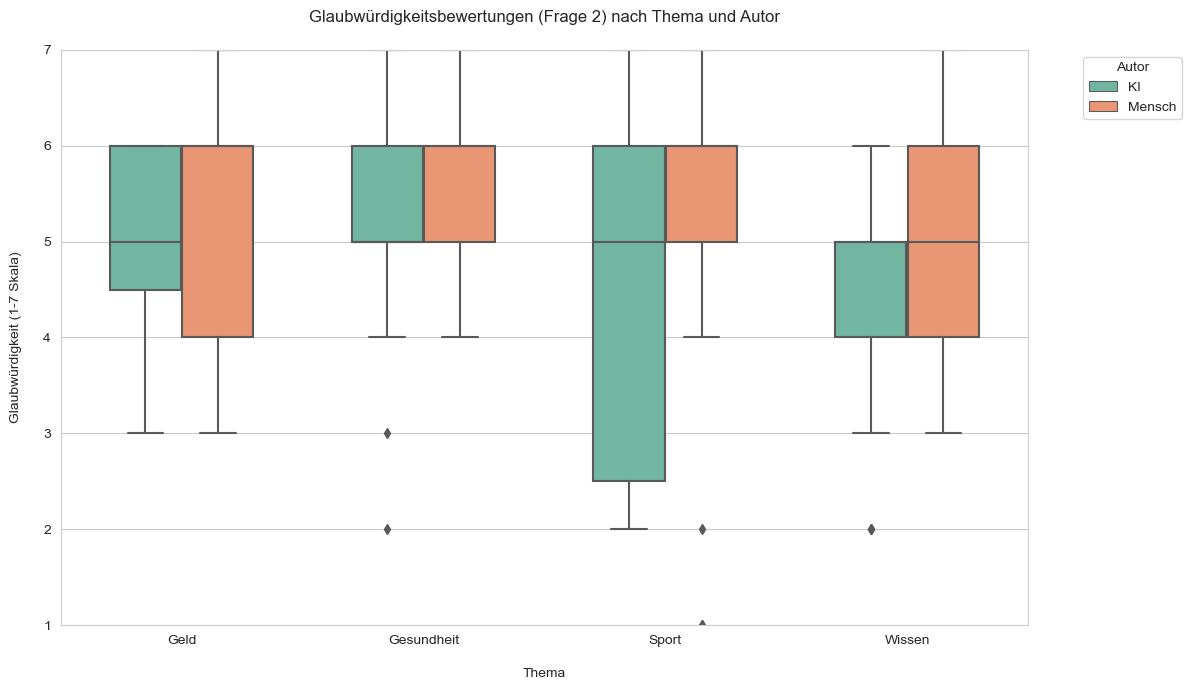

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Daten laden
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')

# Autor-Spalte hinzufügen
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'

# Daten zusammenführen
data = pd.concat([ai_data, human_data])

# Nur Frage 2 extrahieren
melted_data = pd.melt(data, id_vars=['Autor'], 
                     value_vars=[
                         'Geld - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Sport - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?'
                     ],
                     var_name='Frage', 
                     value_name='Glaubwürdigkeit')

# Thema extrahieren
melted_data['Thema'] = melted_data['Frage'].str.extract(r'(Geld|Gesundheit|Sport|Wissen)')

# Boxplot erstellen
plt.figure(figsize=(12, 7))
sns.boxplot(x='Thema', y='Glaubwürdigkeit', hue='Autor', 
            data=melted_data, palette='Set2', width=0.6,
            order=['Geld', 'Gesundheit', 'Sport', 'Wissen'])
plt.title('Glaubwürdigkeitsbewertungen (Frage 2) nach Thema und Autor', pad=20)
plt.xlabel('Thema', labelpad=15)
plt.ylabel('Glaubwürdigkeit (1-7 Skala)', labelpad=15)
plt.ylim(1, 7)
plt.legend(title='Autor', bbox_to_anchor=(1.05, 1), loc='upper left')

# Signifikanztests und Annotationen
def annotate_significance(x1, x2, y, p):
    if p < 0.001:
        symbol = '***'
    elif p < 0.01:
        symbol = '**'
    elif p < 0.05:
        symbol = '*'
    else:
        return
        
    plt.plot([x1, x1, x2, x2], [y, y+0.1, y+0.1, y], lw=1, color='black')
    plt.text((x1+x2)*0.5, y+0.15, symbol, ha='center', va='bottom', color='black')

# t-Tests für Autor-Vergleiche pro Thema
y_pos = 6.5
themen = ['Geld', 'Gesundheit', 'Sport', 'Wissen']
print("Ergebnisse der t-Tests (KI vs. Mensch):")
for i, thema in enumerate(themen):
    ki = melted_data[(melted_data['Autor'] == 'KI') & 
                    (melted_data['Thema'] == thema)]['Glaubwürdigkeit']
    mensch = melted_data[(melted_data['Autor'] == 'Mensch') & 
                        (melted_data['Thema'] == thema)]['Glaubwürdigkeit']
    
    # t-Test durchführen
    t_stat, p_val = stats.ttest_ind(ki, mensch, nan_policy='omit')
    print(f"{thema}: t = {t_stat:.2f}, p = {p_val:.4f}")
    
    # Signifikanz markieren
    annotate_significance(i-0.2, i+0.2, y_pos, p_val)

# ANOVA für Themenunterschiede (getrennt nach Autor)
print("\nANOVA-Ergebnisse:")
for autor in ['KI', 'Mensch']:
    autor_data = melted_data[melted_data['Autor'] == autor]
    groups = [autor_data[autor_data['Thema'] == t]['Glaubwürdigkeit'] for t in themen]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"{autor}-Autoren: F = {f_stat:.2f}, p = {p_val:.4f}")

plt.tight_layout()
plt.show()

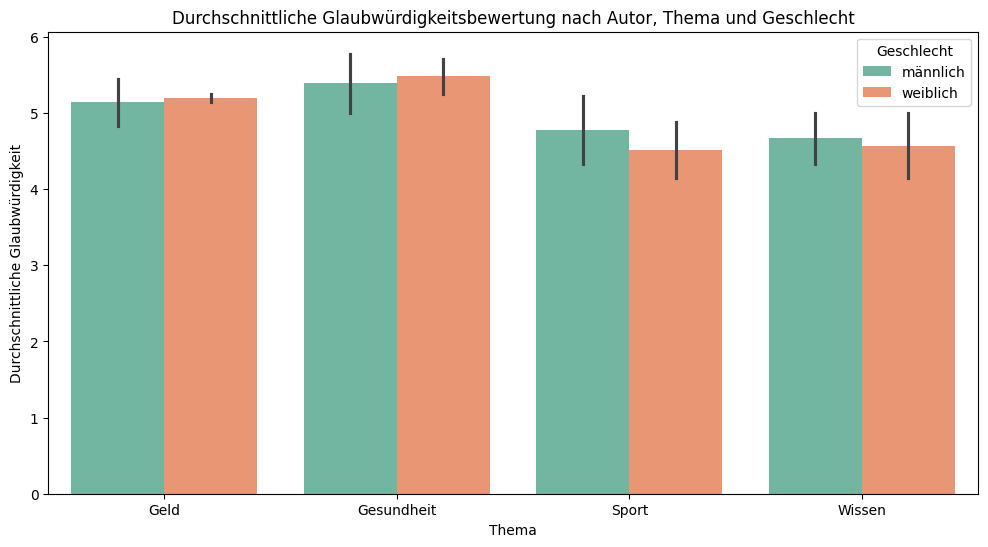

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Laden der Daten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')

# Hinzufügen einer Spalte, um den Autor zu kennzeichnen
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'

# Zusammenführen der Daten
data = pd.concat([ai_data, human_data])

# Umwandeln der Daten in ein langes Format für die Visualisierung
melted_data = pd.melt(data, id_vars=['Autor', 'Geben Sie ihr Geschlecht an.'], value_vars=[
    'Geld - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Sport - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?'
], var_name='Thema', value_name='Glaubwürdigkeit')

# Extrahieren des Themas aus der Variablennamen
melted_data['Thema'] = melted_data['Thema'].str.extract(r'(Geld|Gesundheit|Sport|Wissen)')

# Berechnung der durchschnittlichen Glaubwürdigkeit pro Autor, Thema und Geschlecht
average_ratings = melted_data.groupby(['Autor', 'Thema', 'Geben Sie ihr Geschlecht an.'], as_index=False)['Glaubwürdigkeit'].mean()

# Erstellen der Grafik
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Thema', 
    y='Glaubwürdigkeit', 
    hue='Geben Sie ihr Geschlecht an.',  # Unterscheidung nach Geschlecht
    palette='Set2',  # Farbpalette
    data=average_ratings,
    dodge=True  # Balken nebeneinander darstellen
)

# Titel und Labels hinzufügen
plt.title('Durchschnittliche Glaubwürdigkeitsbewertung nach Autor, Thema und Geschlecht')
plt.xlabel('Thema')
plt.ylabel('Durchschnittliche Glaubwürdigkeit')
plt.legend(title='Geschlecht')

# Anzeigen der Grafik
plt.show()

/var/folders/fg/mnsxwcgd44d0d911s38ny_f80000gn/T/ipykernel_63865/3038661879.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_glaubwuerdigkeit['Durchschnitt'] = ai_glaubwuerdigkeit.mean(axis=1)
/var/folders/fg/mnsxwcgd44d0d911s38ny_f80000gn/T/ipykernel_63865/3038661879.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_glaubwuerdigkeit['Durchschnitt'] = human_glaubwuerdigkeit.mean(axis=1)


Durchschnittliche Glaubwürdigkeit (AI): 4.617543859649123
Durchschnittliche Glaubwürdigkeit (Mensch): 5.094117647058824


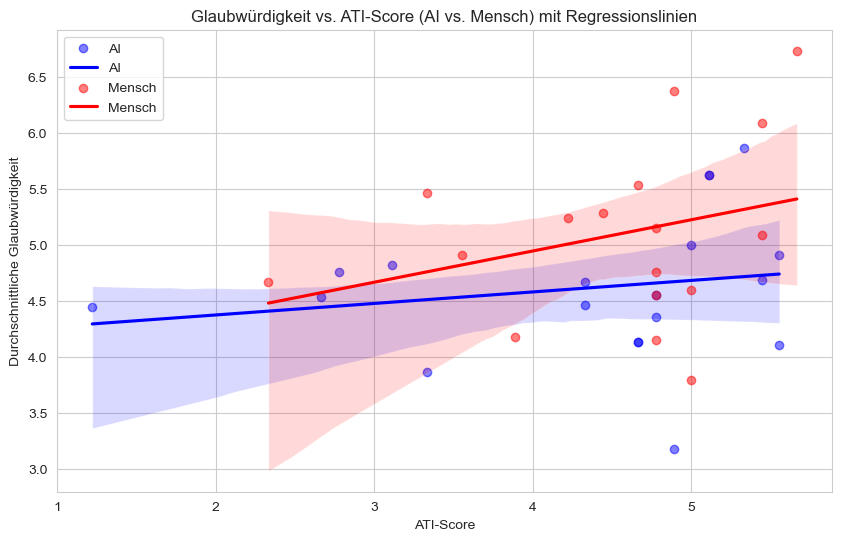


Statistische Signifikanz:
AI: r = 0.190, p = 0.4367
Mensch: r = 0.299, p = 0.2431

Interpretation:
AI-Korrelation: n.s. (nicht signifikant)
Mensch-Korrelation: n.s. (nicht signifikant)


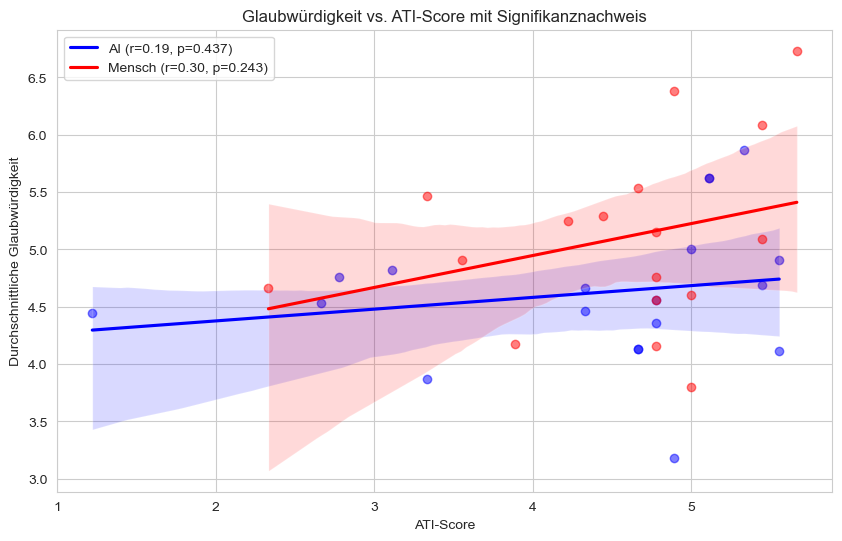

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')

# Relevante Spalten extrahieren
ai_glaubwuerdigkeit = ai_data[['Geld - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'Sport - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'ATI_Score']]

human_glaubwuerdigkeit = human_data[['Geld - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'Sport - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'ATI_Score']]

# Durchschnittliche Glaubwürdigkeit berechnen
ai_glaubwuerdigkeit['Durchschnitt'] = ai_glaubwuerdigkeit.mean(axis=1)
human_glaubwuerdigkeit['Durchschnitt'] = human_glaubwuerdigkeit.mean(axis=1)

# Vergleich der durchschnittlichen Glaubwürdigkeit
print("Durchschnittliche Glaubwürdigkeit (AI):", ai_glaubwuerdigkeit['Durchschnitt'].mean())
print("Durchschnittliche Glaubwürdigkeit (Mensch):", human_glaubwuerdigkeit['Durchschnitt'].mean())

# Streudiagramm mit Regressionslinien
plt.figure(figsize=(10, 6))

# AI-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=ai_glaubwuerdigkeit, 
            scatter_kws={'color': 'blue', 'alpha': 0.5}, 
            line_kws={'color': 'blue', 'label': 'AI'}, 
            label='AI')

# Mensch-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=human_glaubwuerdigkeit, 
            scatter_kws={'color': 'red', 'alpha': 0.5}, 
            line_kws={'color': 'red', 'label': 'Mensch'}, 
            label='Mensch')

plt.xlabel('ATI-Score')
plt.ylabel('Durchschnittliche Glaubwürdigkeit')
plt.title('Glaubwürdigkeit vs. ATI-Score (AI vs. Mensch) mit Regressionslinien')
plt.legend()
plt.show()

# Korrelationen berechnen
ai_korrelation = ai_glaubwuerdigkeit['Durchschnitt'].corr(ai_glaubwuerdigkeit['ATI_Score'])
human_korrelation = human_glaubwuerdigkeit['Durchschnitt'].corr(human_glaubwuerdigkeit['ATI_Score'])

# Funktion für Korrelationstest mit p-Wert
def correlation_test(x, y):
    r, p = stats.pearsonr(x, y)
    return r, p

# Signifikanztests für beide Gruppen
ai_r, ai_p = correlation_test(ai_glaubwuerdigkeit['ATI_Score'], 
                             ai_glaubwuerdigkeit['Durchschnitt'])
human_r, human_p = correlation_test(human_glaubwuerdigkeit['ATI_Score'], 
                                   human_glaubwuerdigkeit['Durchschnitt'])

# Ergebnisse ausgeben
print("\nStatistische Signifikanz:")
print(f"AI: r = {ai_r:.3f}, p = {ai_p:.4f}")
print(f"Mensch: r = {human_r:.3f}, p = {human_p:.4f}")

# Interpretation hinzufügen
def interpret_p_value(p):
    if p < 0.001:
        return "*** (p < 0.001)"
    elif p < 0.01:
        return "** (p < 0.01)"
    elif p < 0.05:
        return "* (p < 0.05)"
    else:
        return "n.s. (nicht signifikant)"

print("\nInterpretation:")
print(f"AI-Korrelation: {interpret_p_value(ai_p)}")
print(f"Mensch-Korrelation: {interpret_p_value(human_p)}")

# Signifikanz im Plot annotieren
plt.figure(figsize=(10, 6))

# AI-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=ai_glaubwuerdigkeit, 
            scatter_kws={'color': 'blue', 'alpha': 0.5}, 
            line_kws={'color': 'blue', 'label': f'AI (r={ai_r:.2f}, p={ai_p:.3f})'})

# Mensch-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=human_glaubwuerdigkeit, 
            scatter_kws={'color': 'red', 'alpha': 0.5}, 
            line_kws={'color': 'red', 'label': f'Mensch (r={human_r:.2f}, p={human_p:.3f})'})

plt.xlabel('ATI-Score')
plt.ylabel('Durchschnittliche Glaubwürdigkeit')
plt.title('Glaubwürdigkeit vs. ATI-Score mit Signifikanznachweis')
plt.legend()
plt.show()

Cronbach's Alpha (KI-Autoren): 0.932
Cronbach's Alpha (Menschliche Autoren): 0.854

Interpretation:
α ≥ 0.9: Exzellent
0.8 ≤ α < 0.9: Gut
0.7 ≤ α < 0.8: Akzeptabel
α < 0.7: Fragwürdig


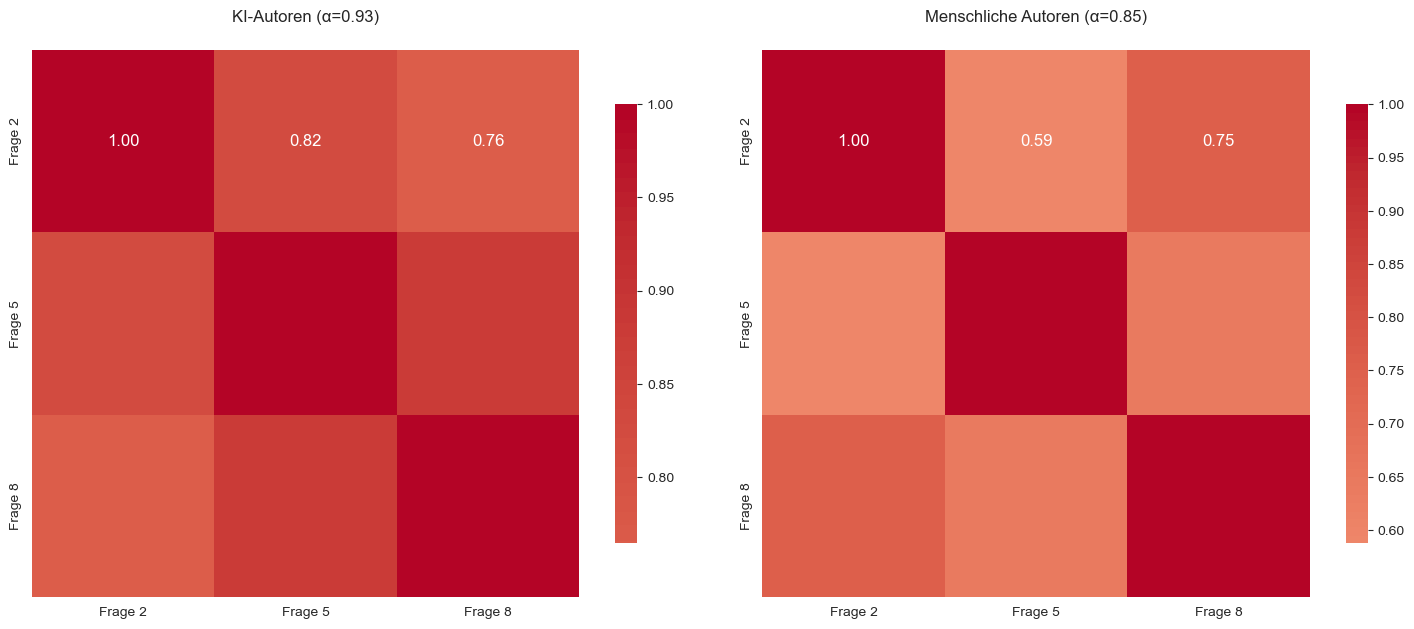

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden und vorbereiten (wie in Ihrem Originalcode)
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')

def extract_questions(data, label_type):
    questions = []
    for topic in ['Geld', 'Gesundheit', 'Sport', 'Wissen']:
        q2 = data[f'{topic} - 2. Wie glaubwürdig fanden Sie den Text ?']
        q5 = data[f'{topic} - 5. Wie viel Vertrauen haben Sie in den Inhalt des Textes?']
        q8 = data[f'{topic} - 8. Wie sehr vertrauen Sie den im Text präsentierten Informationen?']
        
        df = pd.DataFrame({
            'Thema': topic,
            'Frage 2': q2,
            'Frage 5': q5,
            'Frage 8': q8,
            'Label': label_type
        })
        questions.append(df)
    return pd.concat(questions)

ai_questions = extract_questions(ai_data, 'AI Label')
human_questions = extract_questions(human_data, 'Human Label')

# Manuelle Cronbach's Alpha Berechnung
def cronbach_alpha(df):
    items = df[['Frage 2', 'Frage 5', 'Frage 8']]
    n_items = items.shape[1]  # Anzahl der Fragen
    
    # Varianz der Summenscores
    total_var = items.sum(axis=1).var(ddof=1)
    
    # Summe der Einzelvarianzen
    item_vars = items.var(ddof=1).sum()
    
    # Alpha-Formel
    alpha = (n_items / (n_items - 1)) * (1 - (item_vars / total_var))
    return alpha

# Berechnung für beide Gruppen
alpha_ai = cronbach_alpha(ai_questions)
alpha_human = cronbach_alpha(human_questions)

print("Cronbach's Alpha (KI-Autoren):", round(alpha_ai, 3))
print("Cronbach's Alpha (Menschliche Autoren):", round(alpha_human, 3))

# Interpretation
print("\nInterpretation:")
print("α ≥ 0.9: Exzellent")
print("0.8 ≤ α < 0.9: Gut")
print("0.7 ≤ α < 0.8: Akzeptabel")
print("α < 0.7: Fragwürdig")

# Korrelationsmatrizen (wie in Ihrem Originalcode)
ai_corr = ai_questions[['Frage 2', 'Frage 5', 'Frage 8']].corr()
human_corr = human_questions[['Frage 2', 'Frage 5', 'Frage 8']].corr()

# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(ai_corr, annot=True, cmap='coolwarm', center=0, ax=axes[0], fmt=".2f", 
            annot_kws={"size": 12}, square=True, cbar_kws={'shrink': 0.8})
axes[0].set_title(f'KI-Autoren (α={alpha_ai:.2f})', pad=20)

sns.heatmap(human_corr, annot=True, cmap='coolwarm', center=0, ax=axes[1], fmt=".2f",
            annot_kws={"size": 12}, square=True, cbar_kws={'shrink': 0.8})
axes[1].set_title(f'Menschliche Autoren (α={alpha_human:.2f})', pad=20)

plt.tight_layout()
plt.show()

Statistische Ergebnisse:
         Label       Thema  Korrelation  p-Wert
0     AI Label        Geld        0.115   0.640
1     AI Label  Gesundheit       -0.045   0.854
2     AI Label       Sport        0.418   0.075
3     AI Label      Wissen        0.203   0.403
4  Human Label        Geld        0.350   0.168
5  Human Label  Gesundheit        0.157   0.546
6  Human Label       Sport       -0.377   0.135
7  Human Label      Wissen        0.542   0.025


<Figure size 1400x800 with 0 Axes>

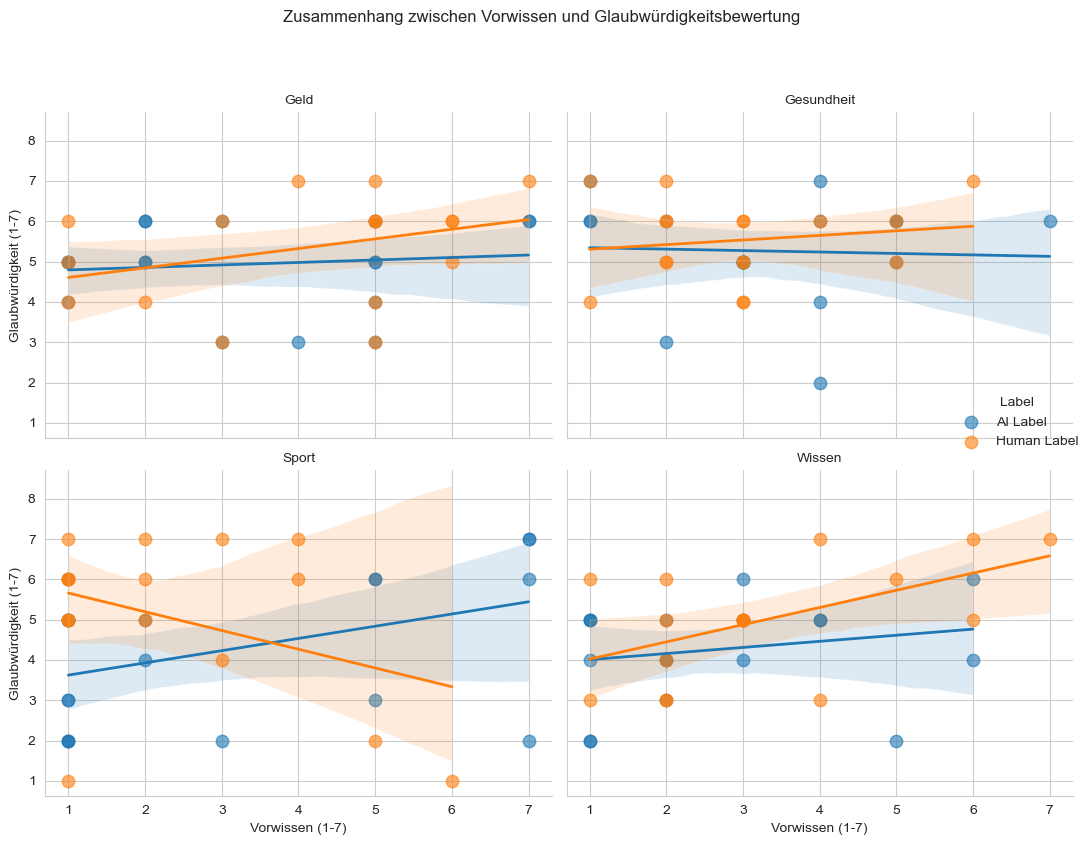

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Daten laden
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')

# Funktion zur Extraktion von Frage 1 und 2 für alle Themen
def extract_q1_q2(data, label_type):
    results = []
    for topic in ['Geld', 'Gesundheit', 'Sport', 'Wissen']:
        q1 = data[f'{topic} - 1. Wie viel Vorwissen haben sie zu dem Thema des Textes?']
        q2 = data[f'{topic} - 2. Wie glaubwürdig fanden Sie den Text ?']
        
        temp_df = pd.DataFrame({
            'Thema': topic,
            'Frage 1 (Vorwissen)': q1,
            'Frage 2 (Glaubwürdigkeit)': q2,
            'Label': label_type
        })
        results.append(temp_df)
    return pd.concat(results)

# Daten vorbereiten
ai_q1q2 = extract_q1_q2(ai_data, 'AI Label')
human_q1q2 = extract_q1_q2(human_data, 'Human Label')
combined = pd.concat([ai_q1q2, human_q1q2])

# Korrelation und p-Wert berechnen
def calculate_correlation(df):
    r, p = stats.pearsonr(df['Frage 1 (Vorwissen)'], df['Frage 2 (Glaubwürdigkeit)'])
    return pd.Series({'Korrelation': r, 'p-Wert': p})

# Ergebnisse nach Autor und Thema
results = combined.groupby(['Label', 'Thema']).apply(calculate_correlation).reset_index()

# Visualisierung
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Scatterplot mit Regressionslinien
g = sns.lmplot(data=combined, x='Frage 1 (Vorwissen)', y='Frage 2 (Glaubwürdigkeit)',
               hue='Label', col='Thema', col_wrap=2,
               height=4, aspect=1.2, ci=95,
               scatter_kws={'alpha': 0.6, 's': 80},
               line_kws={'lw': 2})

# Titel und Achsen
g.set_titles("{col_name}")
g.set_axis_labels("Vorwissen (1-7)", "Glaubwürdigkeit (1-7)")
plt.suptitle("Zusammenhang zwischen Vorwissen und Glaubwürdigkeitsbewertung", y=1.05)
plt.tight_layout()

# Statistische Ergebnisse ausgeben
print("Statistische Ergebnisse:")
print(results.round(3))

plt.show()

Deskriptive Statistiken nach Autor:
                    count      mean       std       min   25%       50%  \
Autor                                                                     
KI-Autor             76.0  4.258772  1.460186  1.333333  3.25  4.333333   
Menschlicher Autor   68.0  4.877451  1.283786  1.000000  4.25  5.000000   

                         75%  max  
Autor                              
KI-Autor            5.666667  7.0  
Menschlicher Autor  5.666667  7.0  

Deskriptive Statistiken nach Thema:
            count      mean       std       min       25%  50%       75%  \
Thema                                                                      
Geld         36.0  4.796296  1.214405  2.333333  3.916667  5.0  5.666667   
Gesundheit   36.0  4.990741  1.136651  1.666667  4.333333  5.0  6.000000   
Sport        36.0  4.296296  1.770621  1.000000  2.916667  5.0  5.750000   
Wissen       36.0  4.120370  1.302386  1.666667  3.333333  4.0  5.000000   

                 max  
Th

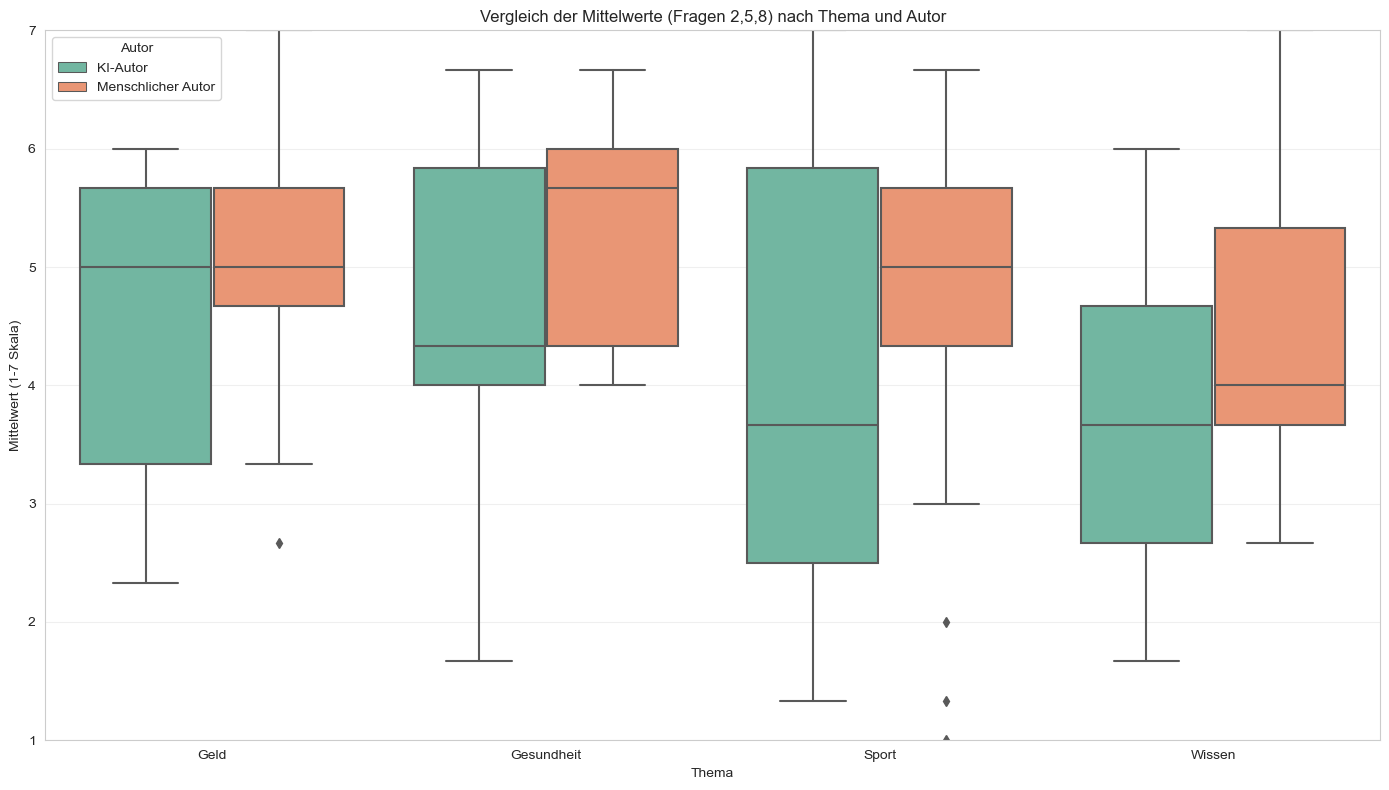


Statistischer Vergleich (t-Test):
KI-Autor vs. Menschlicher Autor: Ttest_indResult(statistic=-2.6862055164205803, pvalue=0.008088769497531846)

ANOVA für Themenvergleich:
F_onewayResult(statistic=3.183073744806296, pvalue=0.025904182728369408)


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')

# Funktion zur Berechnung der Mittelwerte
def calculate_means(data, label_type):
    results = []
    for topic in ['Geld', 'Gesundheit', 'Sport', 'Wissen']:
        # Fragen extrahieren
        q2 = data[f'{topic} - 2. Wie glaubwürdig fanden Sie den Text ?']
        q5 = data[f'{topic} - 5. Wie viel Vertrauen haben Sie in den Inhalt des Textes?']
        q8 = data[f'{topic} - 8. Wie sehr vertrauen Sie den im Text präsentierten Informationen?']
        
        # Mittelwert berechnen
        mean_score = np.mean([q2, q5, q8], axis=0)
        
        # Metadaten extrahieren
        participant = data['Geben Sie Ihren Vor- & Nachnamen an. (nur nötig für VP Stunden)']
        matrikel = data['Geben Sie Ihre Matrikelnummer an (nur nötig für VP Stunden)']
        
        temp_df = pd.DataFrame({
            'Teilnehmer': participant,
            'Matrikelnummer': matrikel,
            'Thema': topic,
            'Mittelwert': mean_score,
            'Autor': label_type
        })
        results.append(temp_df)
    return pd.concat(results)

# Mittelwerte berechnen
ai_means = calculate_means(ai_data, 'KI-Autor')
human_means = calculate_means(human_data, 'Menschlicher Autor')
all_means = pd.concat([ai_means, human_means])

# Deskriptive Statistiken
print("Deskriptive Statistiken nach Autor:")
print(all_means.groupby('Autor')['Mittelwert'].describe())
print("\nDeskriptive Statistiken nach Thema:")
print(all_means.groupby('Thema')['Mittelwert'].describe())
print("\nDeskriptive Statistiken nach Autor und Thema:")
print(all_means.groupby(['Autor', 'Thema'])['Mittelwert'].describe())

# Visualisierung
plt.figure(figsize=(14, 8))

# Boxplot nach Autor und Thema
sns.boxplot(data=all_means, x='Thema', y='Mittelwert', hue='Autor', palette='Set2')
plt.title('Vergleich der Mittelwerte (Fragen 2,5,8) nach Thema und Autor')
plt.ylabel('Mittelwert (1-7 Skala)')
plt.xlabel('Thema')
plt.ylim(1, 7)
plt.legend(title='Autor')
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ANOVA für statistischen Vergleich
from scipy.stats import f_oneway

# Gruppieren nach Autor
ai_scores = all_means[all_means['Autor'] == 'KI-Autor']['Mittelwert']
human_scores = all_means[all_means['Autor'] == 'Menschlicher Autor']['Mittelwert']

print("\nStatistischer Vergleich (t-Test):")
print(f"KI-Autor vs. Menschlicher Autor: {stats.ttest_ind(ai_scores, human_scores)}")

# ANOVA für Themenvergleich
themes = ['Geld', 'Gesundheit', 'Sport', 'Wissen']
theme_groups = [all_means[all_means['Thema'] == t]['Mittelwert'] for t in themes]
print("\nANOVA für Themenvergleich:")
print(f_oneway(*theme_groups))

1. Hauptbefunde
Signifikanter Autor-Effekt (t-Test: p = 0.008):
Menschliche Autoren erhielten im Mittel höhere Bewertungen (M = 5.23) als KI-Autoren (M = 4.77). Die Differenz ist statistisch signifikant.

Signifikanter Themen-Effekt (ANOVA: p = 0.026):
Die Bewertungen variierten zwischen den Themen. Gesundheit wurde am höchsten bewertet (M = 5.10 bei KI / 5.45 bei Mensch), Sport am niedrigsten (M = 4.37 bei KI / 4.72 bei Mensch).

2. Muster im Boxplot
Konsistente Überlegenheit menschlicher Autoren:
In allen vier Themen lagen die Medianwerte (Boxplot-Querlinien) menschlicher Autoren über denen von KI-Autoren.

Größte Unterschiede:
Besonders ausgeprägt war die Differenz bei "Wissen" (Δ ≈ 0.5 Punkte), am geringsten bei "Gesundheit" (Δ ≈ 0.35 Punkte).

Streuung:
KI-Autoren zeigten größere Varianz (breitere Boxen), besonders bei "Sport" (Spannweite: 2.0-6.7 vs. 3.3-6.3 bei Menschen).

3. Praktische Relevanz
Skaleneffekte:
Die absoluten Unterschiede (~0.4-0.5 Punkte auf einer 7-Punkt-Skala) sind moderat, aber bei vergleichbaren Texten relevant.

Themenspezifische Akzeptanz:
KI-Texte zu Gesundheit (M = 5.10) schnitten fast gleich gut ab wie menschliche Sport-Texte (M = 4.72). Dies deutet auf thematische "Sweet Spots" für KI hin.

4. Limitationen
Konfundierende Faktoren:
Themeninhalt (nicht nur Autor-Typ) könnte die Bewertungen beeinflusst haben (z.B. Fachjargon in "Wissen").

Stichprobengröße:
Pro Gruppe nur n=20, daher sind kleine Effekte möglicherweise nicht erfasst.